#### Import Libraries

In [39]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# High-Resolution Graph Output option for Retina Displays
%config InlineBackend.figure_format = 'retina'

#### Fetching VW-LAB Data (geojson data)

In [40]:
SHP_PATH = os.path.join(os.getcwd(), '89_data', 'vw-lab.HangJeongDong_ver20220701.geojson')
dong_gdf = gpd.read_file(SHP_PATH)  
dong_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3513 entries, 0 to 3512
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  3513 non-null   int64   
 1   adm_nm    3513 non-null   object  
 2   adm_cd    3513 non-null   object  
 3   adm_cd2   3513 non-null   object  
 4   sgg       3513 non-null   object  
 5   sido      3513 non-null   object  
 6   sidonm    3513 non-null   object  
 7   sggnm     3513 non-null   object  
 8   adm_cd8   3513 non-null   object  
 9   geometry  3513 non-null   geometry
dtypes: geometry(1), int64(1), object(8)
memory usage: 274.6+ KB


In [4]:
dong_gdf.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


#### Filtering

##### Unique Items

In [5]:
dong_gdf['sgg'].unique().size

250

In [6]:
unique_sgg_gdf = dong_gdf.drop_duplicates(subset='sgg')
unique_sgg_gdf.size
# row 250 * column 10 = 2500

2500

##### Filtering with Column

* isin()

In [8]:
# 특정값 전체가 포함된 컬럼 추출('고흥', '순천'을 입력하면 나오지 않음)
dong_gdf[dong_gdf.sggnm.isin(['고흥군', '순천시'])].head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
2488,2512,전라남도 순천시 승주읍,3603011,4615025000,46150,46,전라남도,순천시,36030110,"MULTIPOLYGON (((127.41012 35.04867, 127.41015 ..."
2489,2513,전라남도 순천시 주암면,3603031,4615035000,46150,46,전라남도,순천시,36030310,"MULTIPOLYGON (((127.24622 35.11001, 127.24747 ..."
2490,2514,전라남도 순천시 송광면,3603032,4615036000,46150,46,전라남도,순천시,36030320,"MULTIPOLYGON (((127.30965 35.00704, 127.30994 ..."
2491,2515,전라남도 순천시 외서면,3603033,4615037000,46150,46,전라남도,순천시,36030330,"MULTIPOLYGON (((127.30579 34.94556, 127.30691 ..."
2492,2516,전라남도 순천시 낙안면,3603034,4615038000,46150,46,전라남도,순천시,36030340,"MULTIPOLYGON (((127.36735 34.96018, 127.36782 ..."


* str.contains()

In [10]:
# 특정값을 포함한 경우
dong_gdf[dong_gdf.adm_nm.str.contains('고흥')].head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
2575,2599,전라남도 고흥군 고흥읍,3635011,4677025000,46770,46,전라남도,고흥군,36550110,"MULTIPOLYGON (((127.31575 34.61709, 127.31622 ..."
2576,2600,전라남도 고흥군 도양읍,3635012,4677025300,46770,46,전라남도,고흥군,36550120,"MULTIPOLYGON (((127.27711 34.37894, 127.27693 ..."
2577,2601,전라남도 고흥군 풍양면,3635031,4677031000,46770,46,전라남도,고흥군,36550310,"MULTIPOLYGON (((127.27711 34.56760, 127.27720 ..."
2578,2602,전라남도 고흥군 도덕면,3635032,4677032000,46770,46,전라남도,고흥군,36550320,"MULTIPOLYGON (((127.19955 34.59534, 127.19902 ..."
2579,2603,전라남도 고흥군 금산면,3635033,4677033000,46770,46,전라남도,고흥군,36550330,"MULTIPOLYGON (((127.21444 34.41733, 127.21390 ..."


* str.start/endswith()

In [31]:
dong_gdf[dong_gdf.adm_nm.str.startswith('전라')].head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry,gu_cd
2197,2221,전라북도 전주시완산구 동서학동,3501160,4511165000,45111,45,전라북도,전주시완산구,35011600,"MULTIPOLYGON (((127.21728 35.80164, 127.21741 ...",35011
2198,2222,전라북도 전주시완산구 서서학동,3501161,4511166000,45111,45,전라북도,전주시완산구,35011610,"MULTIPOLYGON (((127.15319 35.81067, 127.15223 ...",35011
2199,2223,전라북도 전주시완산구 중화산1동,3501162,4511167100,45111,45,전라북도,전주시완산구,35011620,"MULTIPOLYGON (((127.13850 35.81374, 127.13786 ...",35011
2200,2224,전라북도 전주시완산구 중화산2동,3501163,4511167200,45111,45,전라북도,전주시완산구,35011630,"MULTIPOLYGON (((127.12665 35.82523, 127.12742 ...",35011
2201,2225,전라북도 전주시완산구 평화1동,3501164,4511169100,45111,45,전라북도,전주시완산구,35011640,"MULTIPOLYGON (((127.15194 35.78141, 127.15033 ...",35011


* str.slice()

In [27]:
dong_gdf['gu_cd'] = dong_gdf.adm_cd.str.slice(start=0, stop=5)

In [28]:
dong_gdf.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry,gu_cd
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ...",11010
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ...",11010
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ...",11010
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ...",11010
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ...",11010


* Comparison Operator(==, !=, >, <)

In [13]:
# 논리 연산자로 복수 조건을 추출할 경우 각 조건은 '()'로 둘러 쌓여야 함.
dong_gdf[(dong_gdf.sido=='11') & (dong_gdf.sggnm=='중구')].head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
17,18,서울특별시 중구 소공동,1102052,1114052000,11140,11,서울특별시,중구,11020520,"MULTIPOLYGON (((126.98109 37.56180, 126.98050 ..."
18,19,서울특별시 중구 회현동,1102054,1114054000,11140,11,서울특별시,중구,11020540,"MULTIPOLYGON (((126.98536 37.55424, 126.98543 ..."
19,20,서울특별시 중구 명동,1102055,1114055000,11140,11,서울특별시,중구,11020550,"MULTIPOLYGON (((126.97703 37.56919, 126.97758 ..."
20,21,서울특별시 중구 필동,1102057,1114057000,11140,11,서울특별시,중구,11020570,"MULTIPOLYGON (((126.99347 37.56300, 126.99339 ..."
21,22,서울특별시 중구 장충동,1102058,1114058000,11140,11,서울특별시,중구,11020580,"MULTIPOLYGON (((127.00957 37.56303, 127.00936 ..."


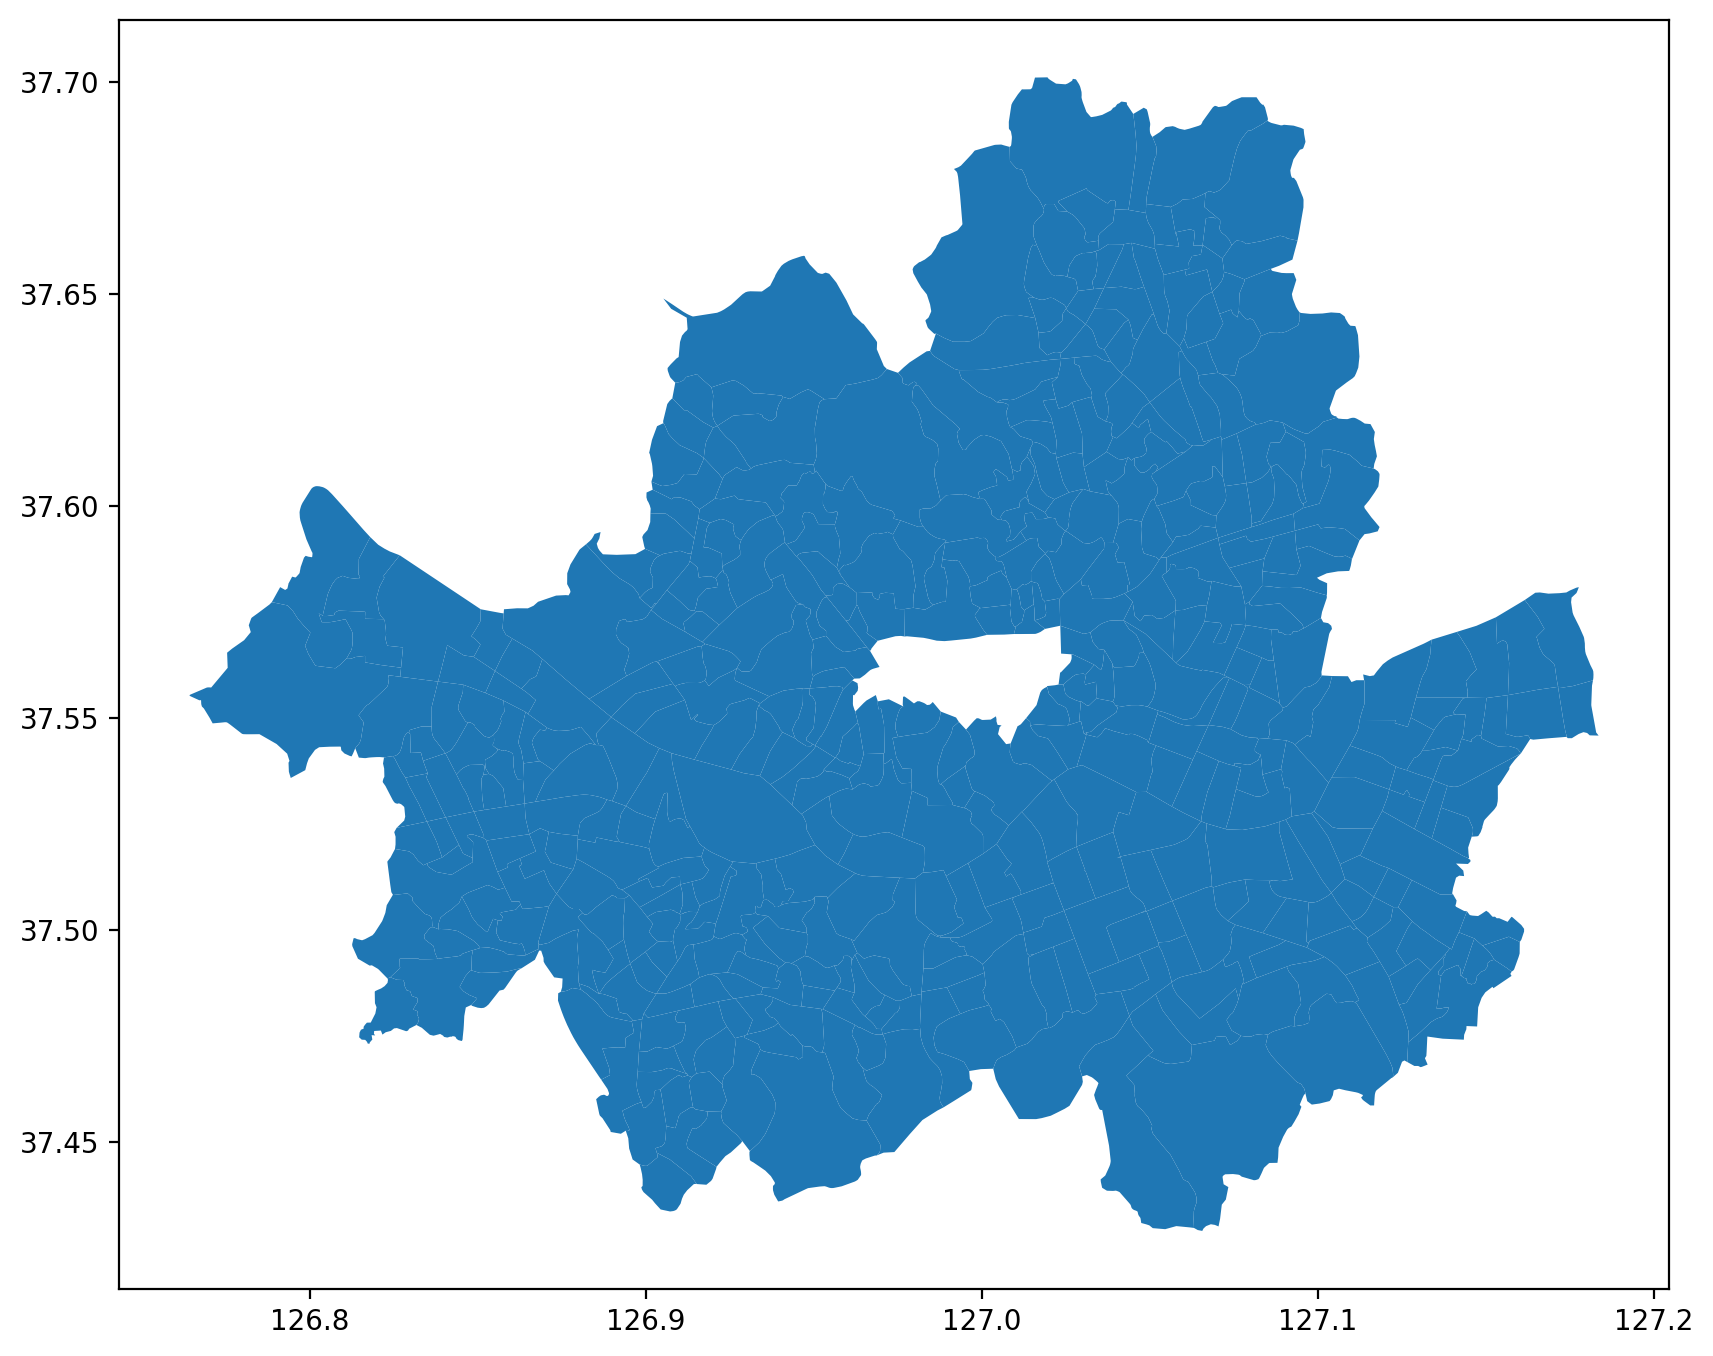

In [16]:
dong_gdf[(dong_gdf.sido=='11') & ~(dong_gdf.sggnm=='중구')].plot(figsize=(10,10))
plt.show()

#### Displaying Nested Map Layers
* In South Korea, 'Jung-gu' exists in multiple cities.

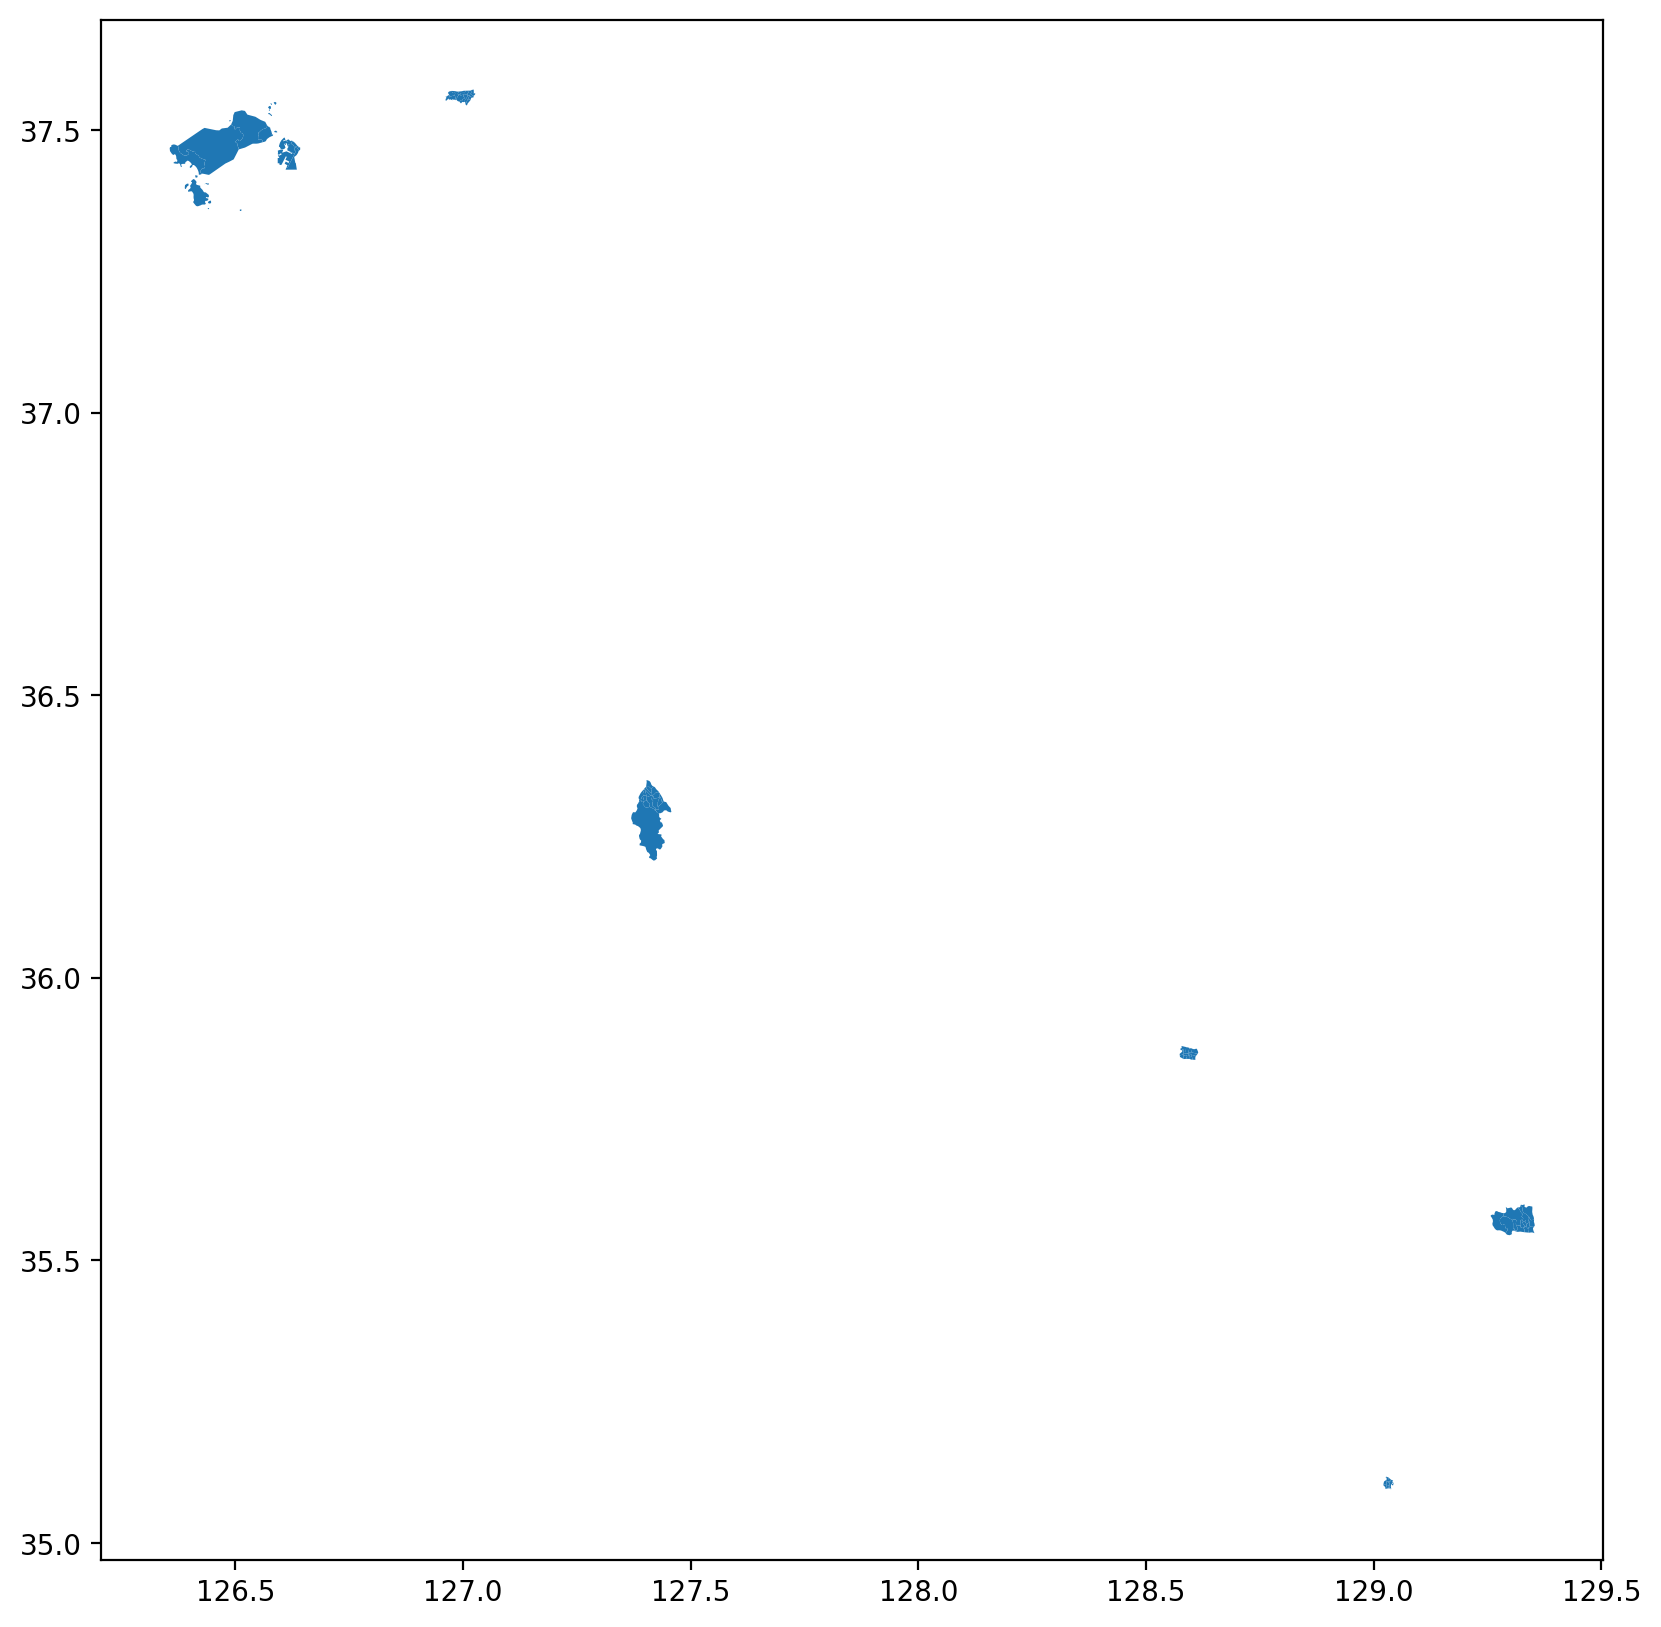

In [19]:
dong_gdf[dong_gdf.sggnm=='중구'].plot(figsize=(10,10))
plt.show()
# The map below shows the Jung-gu district, but it is difficult to determine which city it belongs to.

* Displaing Multi-Layers

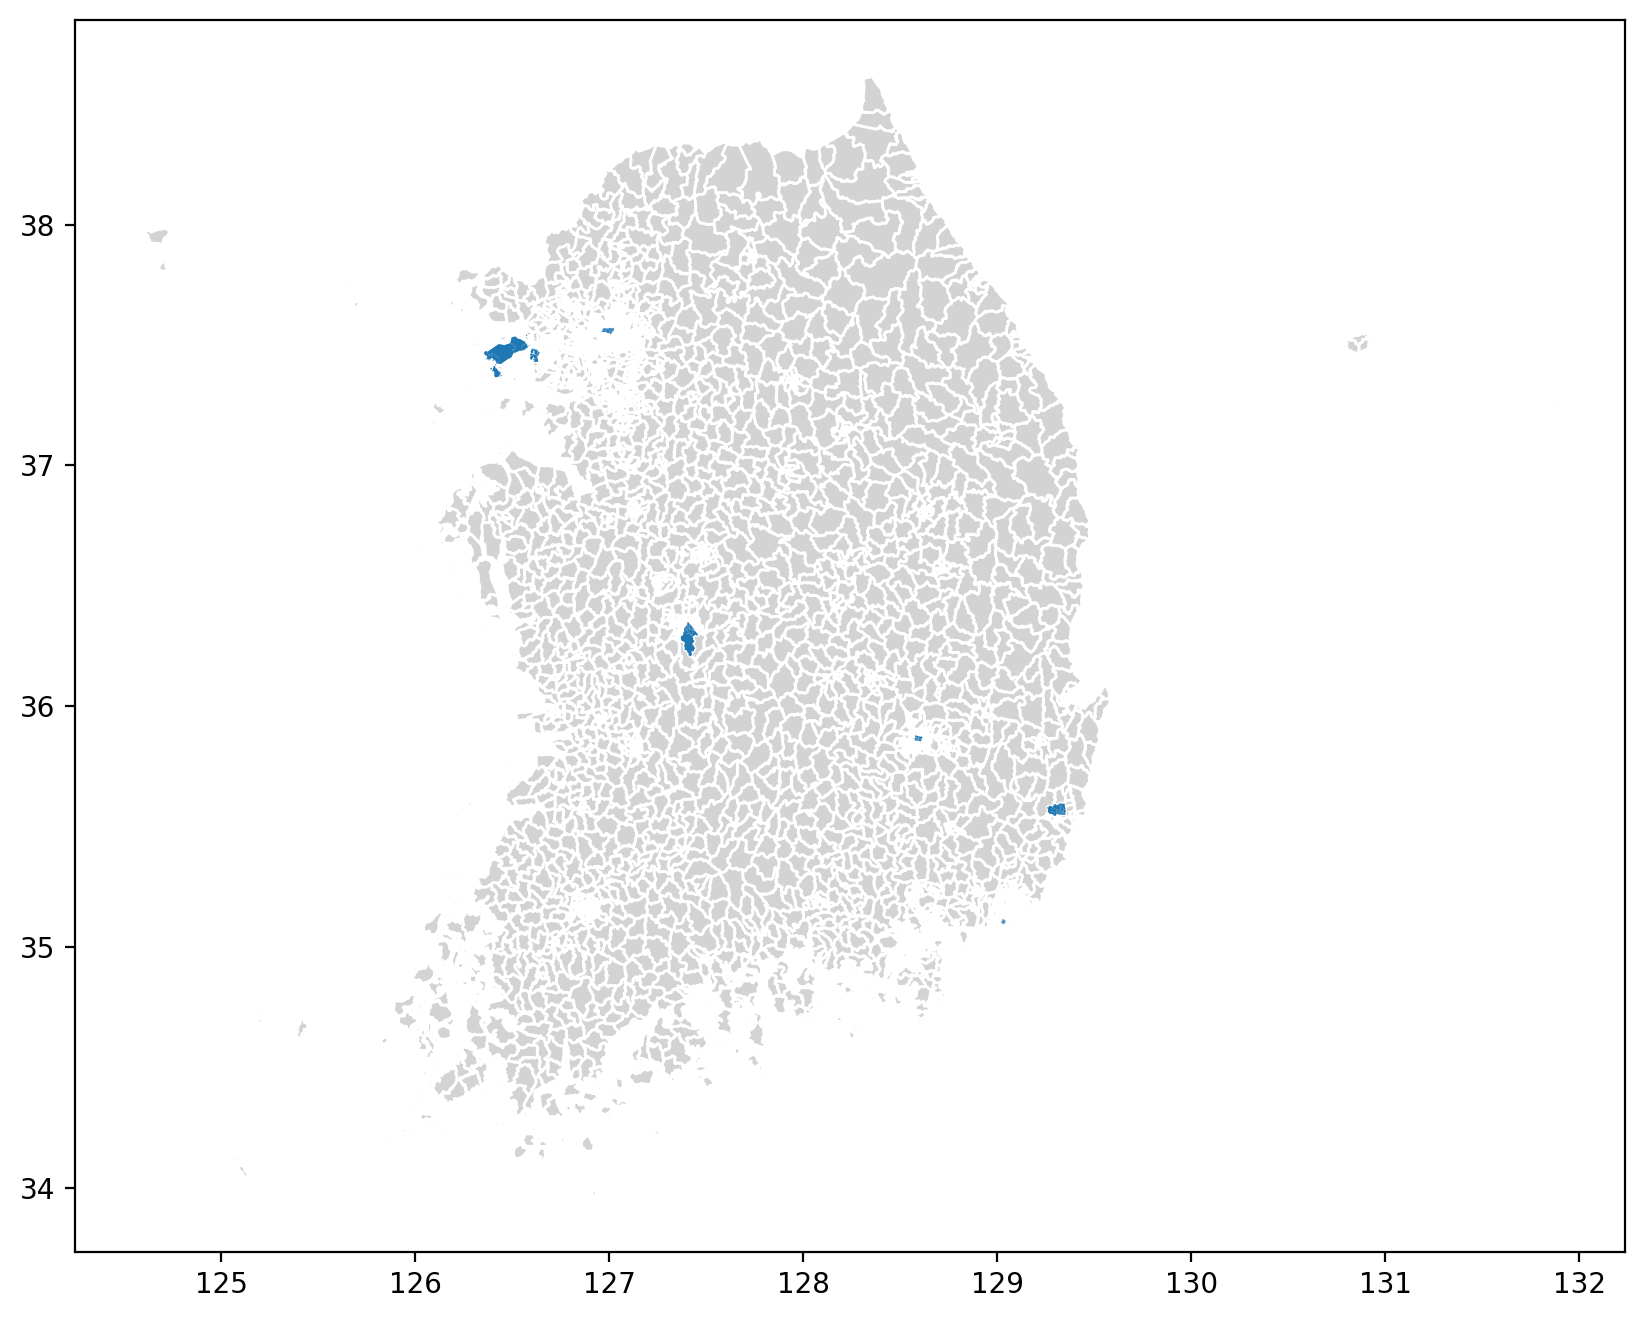

In [26]:
# 제주도 뺀 전체 남한 지도
all_layers = dong_gdf[~dong_gdf.sidonm.str.contains('제주')].plot(figsize=(10,10), color='lightgray', edgecolors='white')
dong_gdf[dong_gdf.sggnm=='중구'].plot(ax=all_layers)
plt.show()

* Highlight only 'Gun' areas.

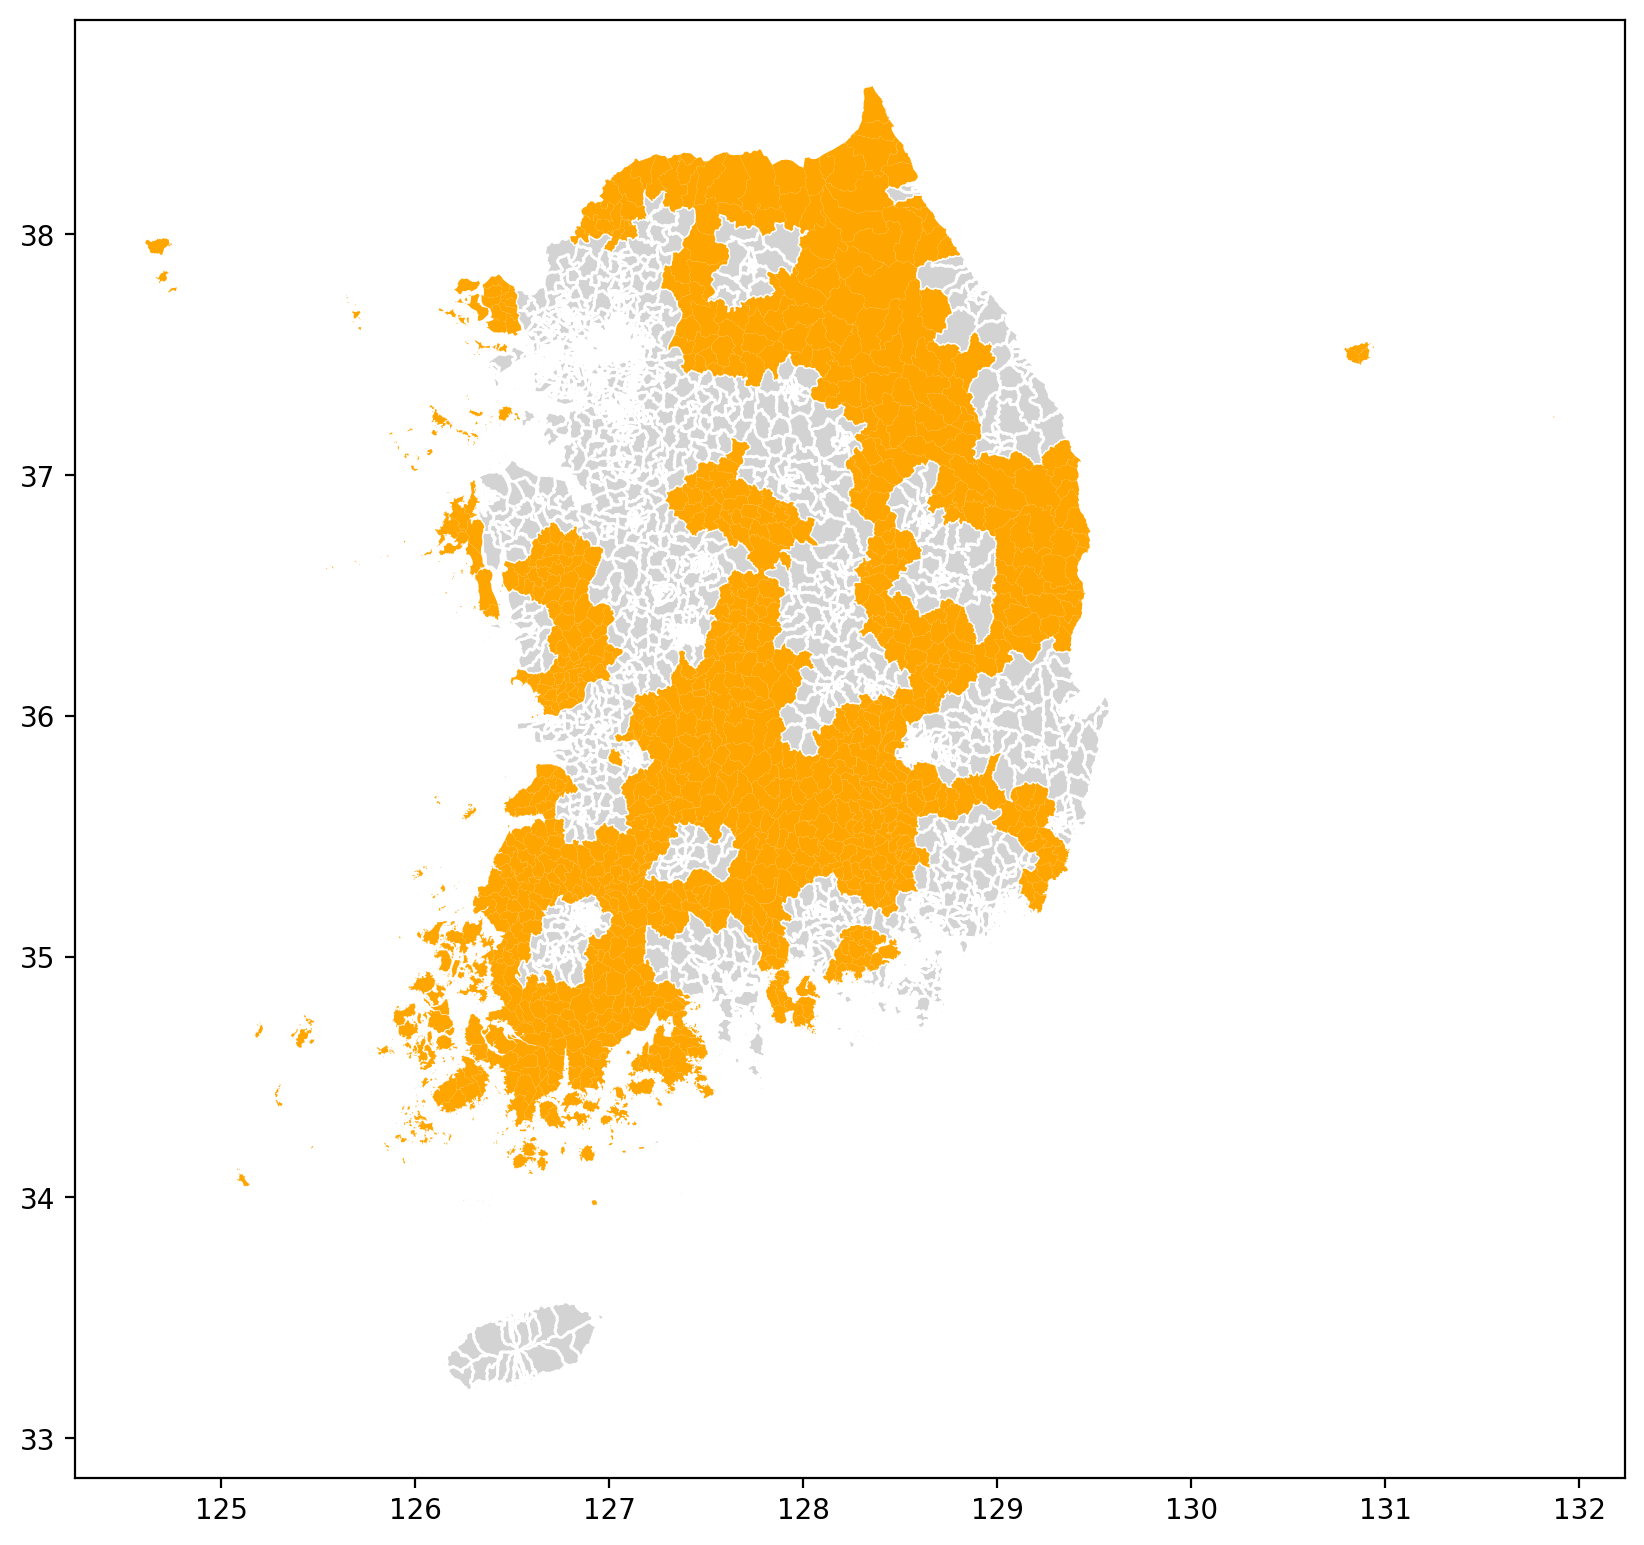

In [33]:
all_layers = dong_gdf.plot(figsize=(10,10), color='lightgray', edgecolors='white')
dong_gdf[dong_gdf.sggnm.str.endswith('군')].plot(facecolor='orange', ax=all_layers)
plt.show()

* Display only shapes(geometry) with an area greater than a certain value

In [41]:
dong_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
# dong_gdf['geometry'] = dong_gdf.geometry.to_crs('EPSG:4326')
# 위와 같이 해도/안해도 경고가 나옴
area_dong_gdf = dong_gdf[dong_gdf.geometry.area > 0.03]
area_dong_gdf.head()

/tmp/ipykernel_89860/482230483.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  area_dong_gdf = dong_gdf[dong_gdf.geometry.area > 0.03]


,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
1767,1791,강원도 홍천군 내면,3231039,4272039000,42720,42,강원도,홍천군,32510390,"MULTIPOLYGON (((128.56690 37.87567, 128.56823 ..."
1792,1816,강원도 평창군 진부면,3234036,4276036000,42760,42,강원도,평창군,32540360,"MULTIPOLYGON (((128.59891 37.77411, 128.59763 ..."
1810,1834,강원도 화천군 화천읍,3237011,4279025000,42790,42,강원도,화천군,32570110,"MULTIPOLYGON (((127.81280 38.32529, 127.83978 ..."
1820,1844,강원도 인제군 인제읍,3239011,4281025000,42810,42,강원도,인제군,32590110,"MULTIPOLYGON (((128.40424 38.09582, 128.40634 ..."
1822,1846,강원도 인제군 북면,3239032,4281032000,42810,42,강원도,인제군,32590320,"MULTIPOLYGON (((128.41761 38.25436, 128.41963 ..."
